In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [2]:
base_dir = "./data"

# Load all text files from the directory
file_list = os.listdir(base_dir)
file_list


n_channels = 20
#f_sample = 

In [3]:
file_list

['README.txt',
 'RECORDS',
 'SHA256SUMS.txt',
 'subject-info.csv',
 'Subject00_1.edf',
 'Subject00_2.edf',
 'Subject01_1.edf',
 'Subject01_2.edf',
 'Subject02_1.edf',
 'Subject02_2.edf',
 'Subject03_1.edf',
 'Subject03_2.edf',
 'Subject04_1.edf',
 'Subject04_2.edf',
 'Subject05_1.edf',
 'Subject05_2.edf',
 'Subject06_1.edf',
 'Subject06_2.edf',
 'Subject07_1.edf',
 'Subject07_2.edf',
 'Subject08_1.edf',
 'Subject08_2.edf',
 'Subject09_1.edf',
 'Subject09_2.edf',
 'Subject10_1.edf',
 'Subject10_2.edf',
 'Subject11_1.edf',
 'Subject11_2.edf',
 'Subject12_1.edf',
 'Subject12_2.edf',
 'Subject13_1.edf',
 'Subject13_2.edf',
 'Subject14_1.edf',
 'Subject14_2.edf',
 'Subject15_1.edf',
 'Subject15_2.edf',
 'Subject16_1.edf',
 'Subject16_2.edf',
 'Subject17_1.edf',
 'Subject17_2.edf',
 'Subject18_1.edf',
 'Subject18_2.edf',
 'Subject19_1.edf',
 'Subject19_2.edf',
 'Subject20_1.edf',
 'Subject20_2.edf',
 'Subject21_1.edf',
 'Subject21_2.edf',
 'Subject22_1.edf',
 'Subject22_2.edf',
 'Subject23_1

In [4]:
df = pd.read_csv(base_dir +'/' +"subject-info.csv")
df

,Subject,Age,Gender,Recording year,Number of subtractions,Count quality
0,Subject00,21,F,2011,9.70,0
1,Subject01,18,F,2011,29.35,1
2,Subject02,19,F,2012,12.88,1
3,Subject03,17,F,2010,31.00,1
4,Subject04,17,F,2010,8.60,0
5,Subject05,16,F,2010,20.71,1
6,Subject06,18,M,2011,4.35,0
7,Subject07,18,F,2012,13.38,1
8,Subject08,26,M,2011,18.24,1
9,Subject09,16,F,2010,7.00,0


In [27]:
from itertools import combinations

def create_eeg_features_empty_dataset():
    signals_columns = [f"channel-{i} " for i in range(0,14)]

    features = ["mean window","the standard deviation", "skewness","kurtosis","derivative","max","min"]

    #for each quarter
    for i in range(4):
        features.append(f"mean {i+1}")
        features.append(f"max {i+1}")
        features.append(f"min {i+1}")

    #for quarters distances
    m = [[1,2],[1,3],[1,4],[2,3],[2,4],[3,4]]
    for i in m:
        features.append(f"distance-mean-{i[0]}-{i[1]}")
        features.append(f"distance-max-{i[0]}-{i[1]}")
        features.append(f"distance-min-{i[0]}-{i[1]}")

    features.append("shannon-entropy")
    features.append("log-entropy")



    #fft features
    features.append("fft_mean")

    #PSD -> short for "Power Spectral Density"
    features.append("psd_mean")
    features.append("psd_max")

    features.append("spectral_entropy")
    features.append("Spectral_edge_frequency")
    features.append("Spectral_peak_frequency.")
    
    fft_features = ["mean","std","skewness","kurtosis","psd_mean","psd_max","psd_std"]
    fft_bands = ["delta","theta","alpha","beta","gamma"]
    '''
    for band in fft_bands:
        for f in fft_features:
            features.append(f"{band}-{f}")
    '''
    electrodes_pair = [c for c in combinations(range(0,20), 2)]

    
    dataset_columns = []
    for col in signals_columns:
        for f in features:
            dataset_columns.append(f"{col}-{f}")


    for pair in electrodes_pair:
        for band in fft_bands:
            dataset_columns.append(f"phase synchronization - {pair[0]}- {pair[1]} -band- {band}")

    dataset_columns.append("result")

    '''
    to-do after dataset_initialization :
        1- calculate the auto correlation between the window and a random window from each category in each electrode
    '''
    dataset = pd.DataFrame(columns = dataset_columns)
    return dataset
    
    
dataset = create_eeg_features_empty_dataset()

dataset

NameError: name 'fft_bands' is not defined

In [6]:
import scipy
def power_spectral_density_features(signal, fs):
    # Calculate power spectral density using Welch's method
    f, Pxx = scipy.signal.welch(signal, fs=fs, nperseg=len(signal))
    
    # Normalize the power spectral density
    Pxx_norm = Pxx / np.sum(Pxx)
    
    # Calculate entropy
    entropy = -np.sum(Pxx_norm * np.log2(Pxx_norm))
    
    # Calculate cumulative sum of normalized power
    cumulative_sum = np.cumsum(Pxx_norm)
    
    # Find the spectral edge frequency (e.g., SEF 50%, the frequency below which 50% of the power is contained)
    sef_index = np.where(cumulative_sum >= 0.5)[0][0]
    sef = f[sef_index]
    
    # Find the peak frequency
    peak_freq = f[np.argmax(Pxx)]
    
    return entropy, sef, peak_freq

def calculate_plv(signal1, signal2, fs):
    # Compute analytic signals
    z1 = scipy.signal.hilbert(signal1)
    z2 = scipy.signal.hilbert(signal2)

    # Compute instantaneous phases
    phase1 = np.angle(z1)
    phase2 = np.angle(z2)

    # Compute phase differences
    phase_diff = phase1 - phase2
    phase_diff = np.where(phase_diff < -np.pi, phase_diff + 2*np.pi, phase_diff)
    phase_diff = np.where(phase_diff > np.pi, phase_diff - 2*np.pi, phase_diff)

    # Compute PLV
    freqs, _, plv = scipy.signal.spectrogram(phase_diff, fs=fs, nperseg=len(signal1), scaling='spectrum', mode='phase')
    f_list = []
    
    for band in [[0.5,4],[4,8],[8,12],[12,30],[30,100]]:
        freq_mask = (freqs >= band[0]) & (freqs <= band[1])
        plv_list = np.mean(plv[freq_mask], axis=0)
        f_list.append(plv_list[0])
    
    return f_list


In [24]:
from matplotlib import mlab
from itertools import combinations 
from scipy.stats import skew, kurtosis, entropy

def extract_features(filename,signal,dataset):
    m = [[0,1],[0,1],[0,3],[1,2],[1,3],[2,3]]
    electrodes_pair = [t for t in combinations([i for i in range(0,n_channels)], 2) ]


    
    print(filename)
    
    classification_result = int(filename.split('_')[1][0])
    fs = signal["info"]['sfreq']
    #iterate over each signal
    window_length = int(fs * 60)
    start = 0
    end = len(signal["data"][0])
    while start + window_length < end :
        #devide each signal for 1 sec window with 0.5 overlap
        #eg [0 -> 1 , 0.5 -> 1.5, 1 -> 2 , 1.5 - >2.5 ] etc


        features_list = []

        #Features dependent on a single electrode
        for channel in signal["data"]:
            one_sec_signal = channel[start : start + window_length]
            plt.plot(one_sec_signal)
            plt.show()
            mean_window = one_sec_signal.mean()
            features_list.append(mean_window)
            print("mean_window")

            std = one_sec_signal.std()
            features_list.append(std)
            print("std")
            # Calculate skewness
            skewness = skew(one_sec_signal)
            features_list.append(skewness)
            print("skewness")
            # Calculate kurtosis
            kurt = kurtosis(one_sec_signal)
            features_list.append(kurt)
            print("kurtosis")
            #derivative
            # take the first half of the one second
            half_sec= one_sec_signal[:len(df)//2]
            derivative=(one_sec_signal.mean()-half_sec.mean())/2
            features_list.append(derivative)
            print("derivative")
            # max and min

            max_t = (one_sec_signal.max()-half_sec.max())/2
            features_list.append(max_t)
            print("max_t")
            
            min_t = (one_sec_signal.min()-half_sec.min())/2
            features_list.append(min_t)
            print("min_t")


            #split second into four quarters

            quarter = len(one_sec_signal) // 4
            q1, q2, q3, q4 = one_sec_signal[:quarter], one_sec_signal[quarter:2*quarter], one_sec_signal[2*quarter:3*quarter], one_sec_signal[3*quarter:]
            quarter_list = [q1, q2, q3, q4]
            for q in quarter_list:
                features_list.append(q.mean())
                features_list.append(q.max())
                features_list.append(q.min())
                print("[q1, q2, q3, q4] mean and min and max")

            for v in m:
                features_list.append(abs(quarter_list[v[0]].mean()-quarter_list[v[1]].mean()))
                features_list.append(abs(quarter_list[v[0]].max()-quarter_list[v[1]].max()))
                features_list.append(abs(quarter_list[v[0]].min()-quarter_list[v[1]].min()))
                print("abs(quarter_list[v[0]].min()-quarter_list[v[1]].min())")

            # Calculate the probability distribution manually
            unique_elements, counts = np.unique(one_sec_signal, return_counts=True)
            probabilities = counts / counts.sum()
            
            # Shannon entropy for 1 second
            shannon_entropy = entropy(probabilities, base=2)
            features_list.append("shannon entropy")

            #log entropy for 2 halfs of the 1 sec (0 -> 0.5) and (0.5 -> 1)
            first_half_sec, second_half_sec = one_sec_signal[:len(one_sec_signal)//2], one_sec_signal[len(one_sec_signal)//2:]

            log_energy_1 = np.log(np.sum(np.square(first_half_sec)))
            log_entropy_1 = scipy.stats.entropy (np.square(first_half_sec) / log_energy_1, base=2)

            log_energy_2 = np.log(np.sum(np.square(second_half_sec)))
            log_entropy_2 = scipy.stats.entropy (np.square(second_half_sec) / log_energy_2, base=2)

            features_list.append(log_entropy_1+log_entropy_2)
            print("log_entropy")


            #fourier transform

            fft = np.fft.fft(one_sec_signal)
            features_list.append(np.abs(fft).mean())
            print("fft abs mean")

            # Compute the PSD of the EEG signal
            window_length = int(fs * 2)  
            Pxx, freqs = mlab.psd(one_sec_signal, Fs=fs)
            features_list.append(Pxx.mean())
            print("Pxx.mean()")
            features_list.append(Pxx.max())
            print("Pxx.max()")


            s_entropy, sef, peak_freq = power_spectral_density_features(one_sec_signal, fs)
            features_list.append(s_entropy)
            print("s_entropy")
            features_list.append(sef)
            print("sef")
            features_list.append(peak_freq)
            print("peak_freq")

            N = len(one_sec_signal)
            T = 1/fs
            t = np.linspace(0.0, N*T, N)
            freqs = np.fft.fftfreq(N, T)


            '''
            for band in [[0.5,4],[4,8],[8,12],[12,30],[30,100]]:

                f_min = band[0]
                f_max = band[1]

                idx = np.where((freqs >= f_min) & (freqs <= f_max))[0]
                coeffs = fft[idx]
                # Compute the magnitudes of the FFT coefficients
                mag = np.abs(coeffs)

                # Compute the mean of the magnitudes
                mean_mag = np.mean(mag)
                features_list.append(mean_mag)
                features_list.append(mag.std())
                features_list.append(scipy.stats.skew(mag) )
                features_list.append(scipy.stats.kurtosis(mag))
                print(len(Pxx))
                print(idx)
                features_list.append(Pxx[idx].mean())
                features_list.append(Pxx[idx].max())
                features_list.append(Pxx[idx].std())
                print("bandssss 22")
                '''
        #Features dependent on two electrodes
        for pair in electrodes_pair:
            signal_1 = np.array(signal[pair[0]][start : start+window_length],dtype="float64")
            signal_2 = np.array(signal[pair[1]][start : start+window_length],dtype="float64")

            plv_list = calculate_plv(signal_1, signal_2, fs)
            for v in plv_list:
                features_list.append(v)
            print(f"electrodes pairs signal 1 and 2")
        features_list.append(classification_result)
        print(f"classification result: {classification_result}")

        dataset.loc[len(dataset)] = features_list

        start += window_length//2

    
    
    dataset = dataset.dropna()
    return dataset


In [25]:
import mne


def load_signal(filename):
    file = f"{base_dir}\\{file_list[4]}"
    data = mne.io.read_raw_edf(file)
    raw_data = data.get_data()
    # you can get the metadata included in the file and a list of all channels:
    info = data.info
    channels = data.ch_names


    
    return {"data": raw_data, "info": info, "channels": channels}


def load_all_signals():
    base_dir = "./data"
    file_list = os.listdir(base_dir)
    dataset = create_eeg_features_empty_dataset()
    for filename in file_list:
        if filename[len(filename)-4:len(filename)] == ".edf":
            print(filename)
            signal = load_signal(filename)
            dataset = extract_features(filename,signal,dataset)
            ##### feature extraction goes here

load_signal(file_list[4])

Extracting EDF parameters from C:\Users\Dell\Desktop\ELEC876-final project\data\Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


{'data': array([[-3.64793763e-06, -4.23648168e-06, -4.95421832e-06, ...,
          1.35446677e-09,  1.35446677e-09,  1.35446677e-09],
        [-3.58186632e-06, -4.27938829e-06, -5.02084864e-06, ...,
         -8.87424125e-10, -8.87424125e-10, -8.87424125e-10],
        [-4.08124663e-06, -4.76621934e-06, -5.78345493e-06, ...,
          4.75066606e-10,  4.75066606e-10,  4.75066606e-10],
        ...,
        [ 2.82213640e-06,  5.31172705e-06,  8.36727827e-06, ...,
          2.82381323e-10,  2.82381323e-10,  2.82381323e-10],
        [ 1.29154198e-06,  9.73218582e-07,  5.79025363e-07, ...,
          1.05613794e-10,  1.05613794e-10,  1.05613794e-10],
        [ 5.41307623e-06,  1.98814371e-06, -3.12957156e-06, ...,
          6.66933700e-09,  6.66933700e-09,  6.66933700e-09]]),
 'info': <Info | 8 non-empty values
  bads: []
  ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
  chs: 21 EEG
  custom_ref_applied: False
  highpass: 0.5 Hz
  lowpass: 45.0 Hz
  meas_date: 201

Subject00_1.edf
Extracting EDF parameters from C:\Users\Dell\Desktop\ELEC876-final project\data\Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Subject00_1.edf


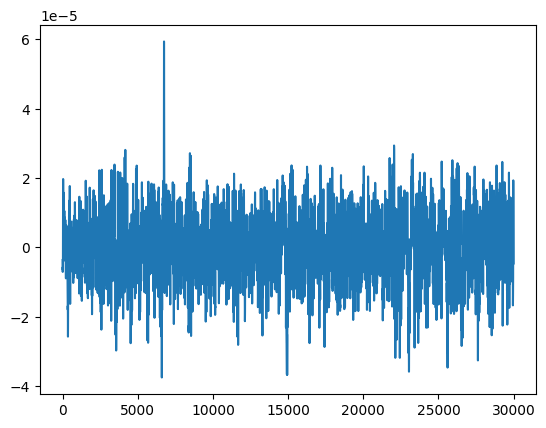

mean_window
std
skewness
kurtosis
derivative
max_t
min_t
[q1, q2, q3, q4] mean and min and max
[q1, q2, q3, q4] mean and min and max
[q1, q2, q3, q4] mean and min and max
[q1, q2, q3, q4] mean and min and max
abs(quarter_list[v[0]].min()-quarter_list[v[1]].min())
abs(quarter_list[v[0]].min()-quarter_list[v[1]].min())
abs(quarter_list[v[0]].min()-quarter_list[v[1]].min())
abs(quarter_list[v[0]].min()-quarter_list[v[1]].min())
abs(quarter_list[v[0]].min()-quarter_list[v[1]].min())
abs(quarter_list[v[0]].min()-quarter_list[v[1]].min())
log_entropy
fft abs mean
Pxx.mean()
Pxx.max()
s_entropy
sef
peak_freq
129
[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 1

IndexError: index 129 is out of bounds for axis 0 with size 129

In [26]:
load_all_signals()

In [ ]:
electrodes_pair